In [ ]:
#Importing all the requirements
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ta
#Reading the data
df=pd.read_csv('Binance-ETHUSDT-22-04-2020')
df['timestamp']=pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S')
df.set_index('timestamp',inplace=True)
df=df.astype(float)
#using TA
df1 = ta.add_all_ta_features(
    df, open="open", high="high", low="low", close="close", volume="volume")
#Method for outcomes and scenarios 0s and 1s
def scenarios(df1=df1,n=30,lower=-0.5,upper=0.5):
    df1=df1[['open','high','low','close','volume']]
    Cumulated_name=[]
    Cumulated_boundary=[]
    for i in range(1,n+1):
        first_name='DiffClose'+str(i)
        second_name='DiffMin'+str(i)
        df1[first_name]=df1['close'].diff(i).shift(-i).fillna(0)/df['close']*100
        df1[second_name]=np.where((df1[first_name]<lower) | (df1[first_name]>upper),i,n)
        Cumulated_name.append(first_name)
        Cumulated_boundary.append(second_name)
    df1['Period']=df1[Cumulated_boundary].min(axis=1)
    df1['Outcome']=df1.apply(lambda x:x['DiffClose'+str(x['Period']).split('.')[0]],axis=1)
    df1=df1[['open','high','low','close','volume','Period','Outcome']]
    return df1
#Selecting indicator and changing names
final=scenarios(df1,n=100)
final['Outcome']=np.where(final['Outcome']>0,'+0.5%','-0,5%')
final['Outcome']=np.where(final['Period']==100,'No Outcome',final['Outcome'])
indicator=pd.concat([df1[['trend_macd','trend_macd_signal','trend_macd_diff']],final],axis=1)
indicator=indicator[indicator['Outcome']!='No Outcome'].dropna()
indicator.columns=['trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'Open', 'High',
       'Low', 'Close', 'Volume', 'Period', 'Outcome']

: 

No handles with labels found to put in legend.


Text(0, 0.5, '% Cases')

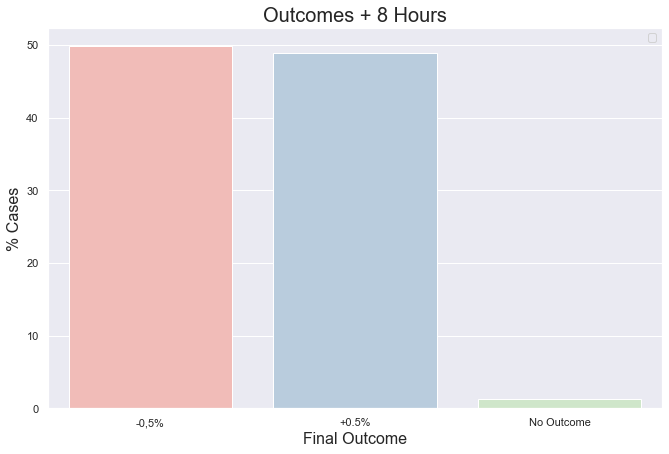

In [6]:
sns.set()
#Outcome chart
data=(final['Outcome'].value_counts()/len(final)*100).reset_index()
data.columns=['Final Outcome','% Cases']
plt.figure(figsize=(11,7))
plt.title('Outcomes + 8 Hours',fontsize=20)
sns.barplot(data=data,x='Final Outcome',y='% Cases',palette='Pastel1')
plt.legend()
plt.xlabel('Final Outcome',fontsize=16)
plt.ylabel('% Cases',fontsize=16)

In [ ]:
import mplfinance as mpf
#loop for adding the images
for i in range(80):
    file=str(i)
    if i <= 9:
        file='0'+file
    apds = [
         mpf.make_addplot((indicator[3*i+140000:3*i+140120]['trend_macd']),panel='lower',color='grey',linestyle='dotted'),
         mpf.make_addplot((indicator[3*i+140000:3*i+140120]['trend_macd_signal']),panel='lower',color='cyan',linestyle='dotted')
       ]    
    mpf.plot(indicator[3*i+140000:3*i+140120],addplot=apds,volume=True,savefig=dict(fname=file+'mplfinance1.jpg',dpi=100,pad_inches=0.25),style='starsandstripes')

    #transforming images to gif
from PIL import Image
import glob

frames = []
imgs = glob.glob("*mplfinance1.jpg")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

frames[0].save('mplfinance1.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=150, loop=0)

C:\Users\maleteli\AppData\Local\Continuum\anaconda3\lib\site-packages\mplfinance\plotting.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\maleteli\AppData\Local\Continuum\anaconda3\lib\site-packages\mplfinance\plotting.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\maleteli\AppData\Local\Continuum\anaconda3\lib\site-packages\mplfinance\plotting.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure

C:\Users\maleteli\AppData\Local\Continuum\anaconda3\lib\site-packages\mplfinance\plotting.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\maleteli\AppData\Local\Continuum\anaconda3\lib\site-packages\mplfinance\plotting.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\maleteli\AppData\Local\Continuum\anaconda3\lib\site-packages\mplfinance\plotting.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure

C:\Users\maleteli\AppData\Local\Continuum\anaconda3\lib\site-packages\mplfinance\plotting.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\maleteli\AppData\Local\Continuum\anaconda3\lib\site-packages\mplfinance\plotting.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\maleteli\AppData\Local\Continuum\anaconda3\lib\site-packages\mplfinance\plotting.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure

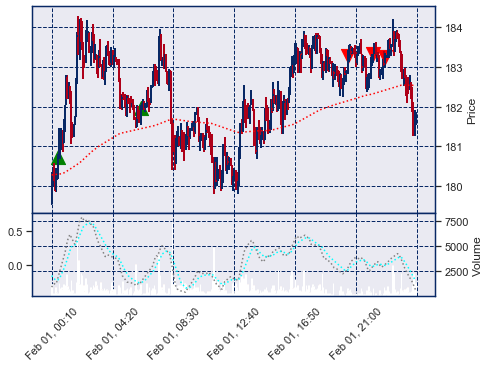

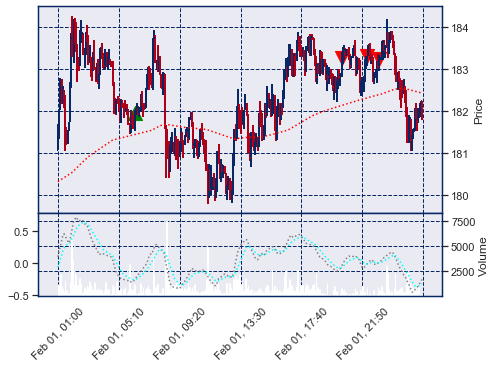

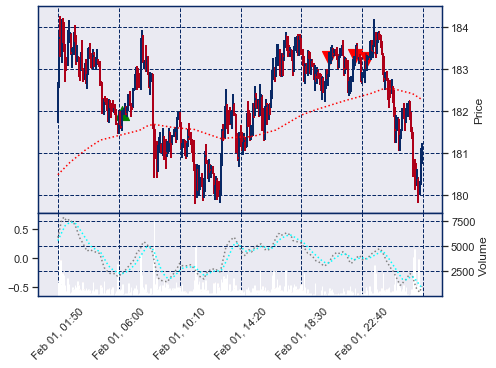

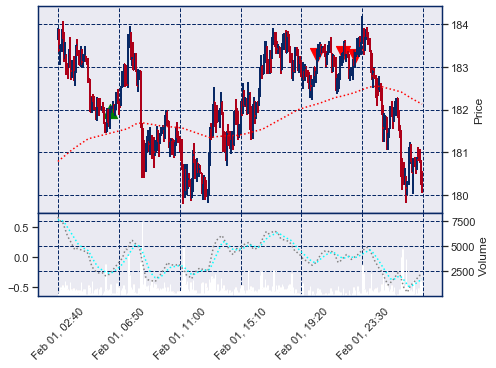

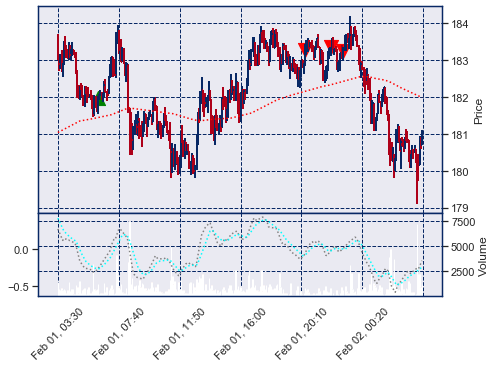

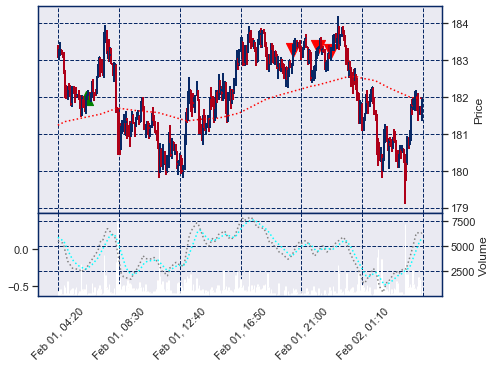

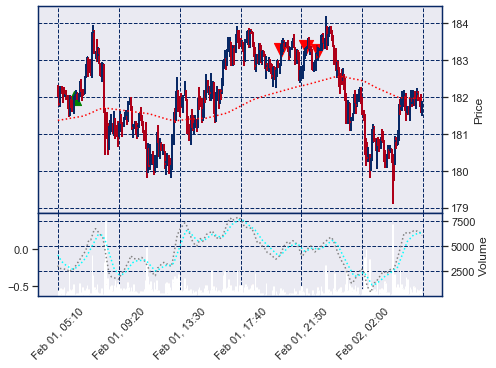

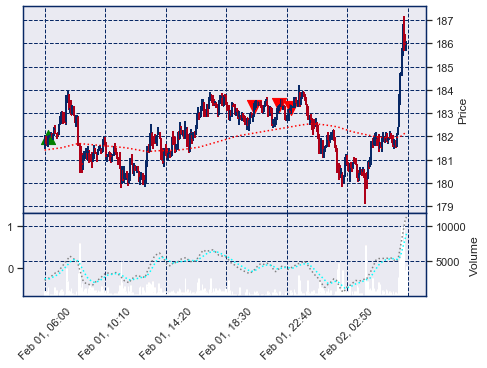

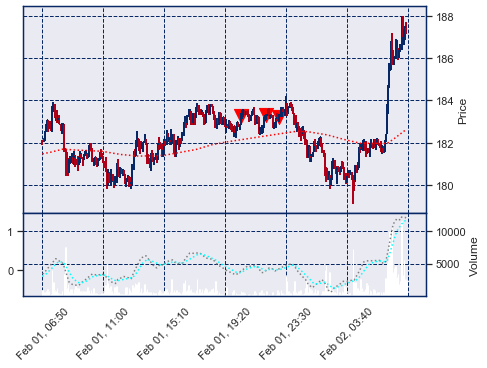

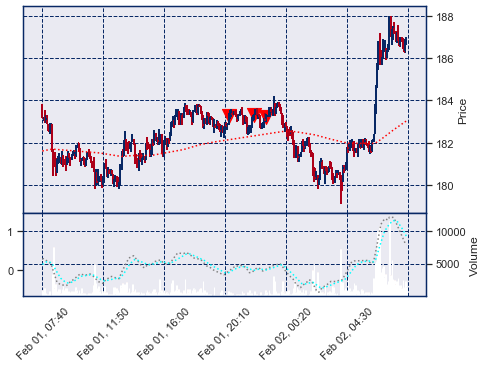

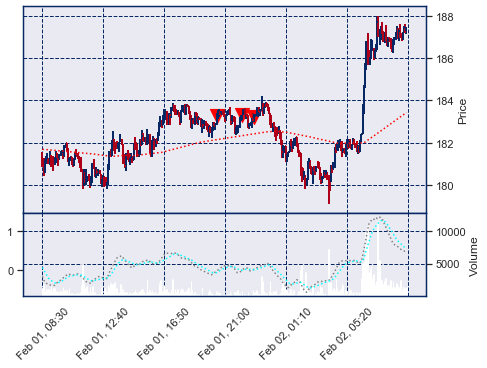

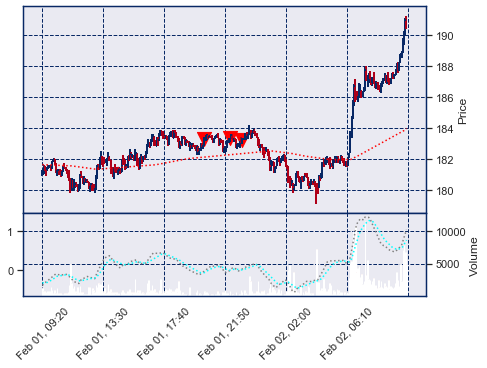

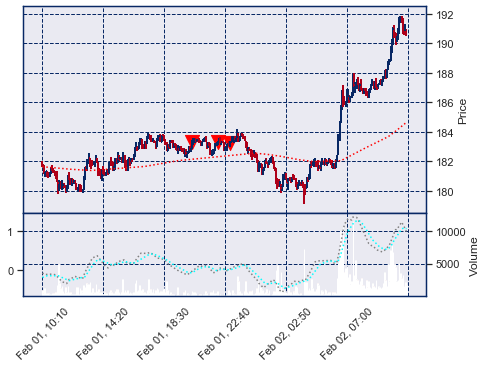

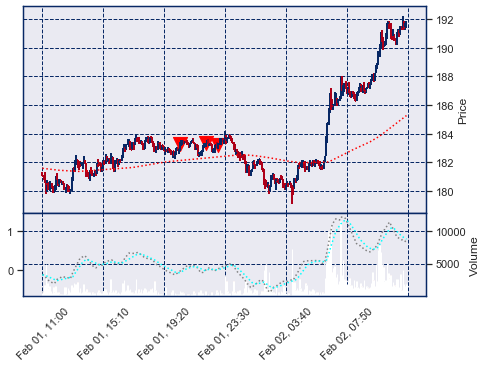

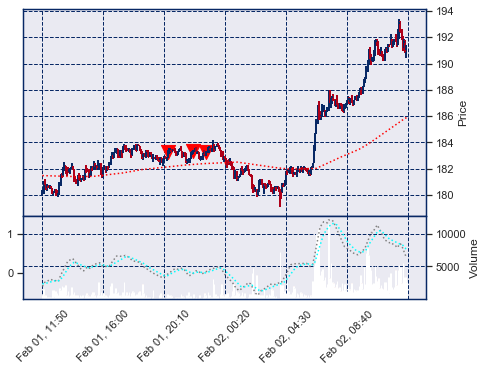

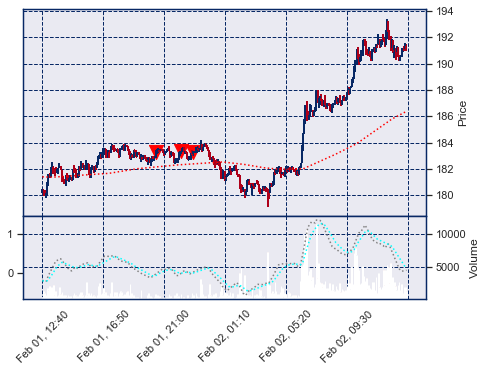

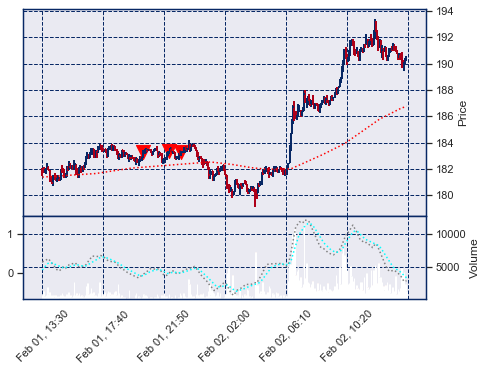

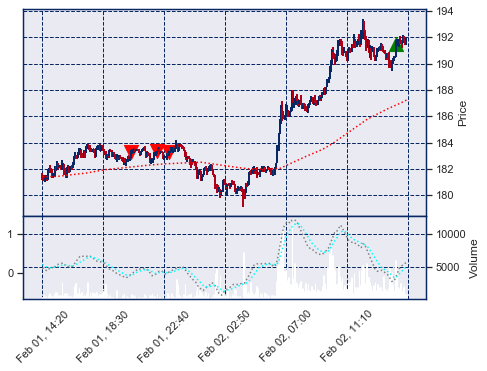

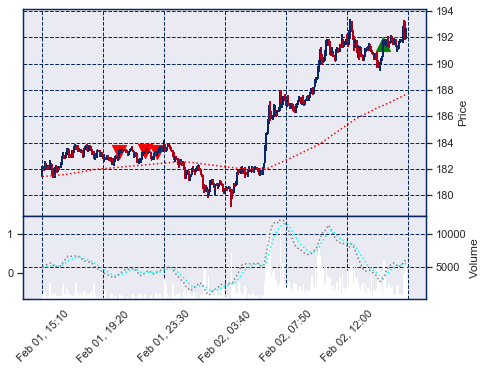

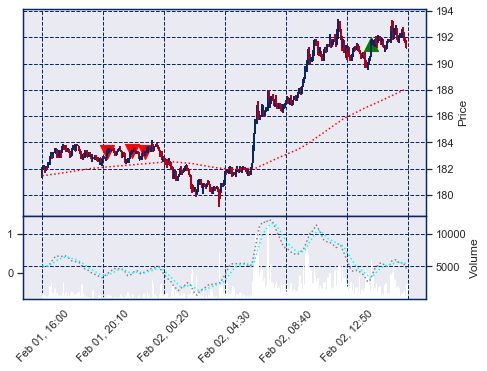

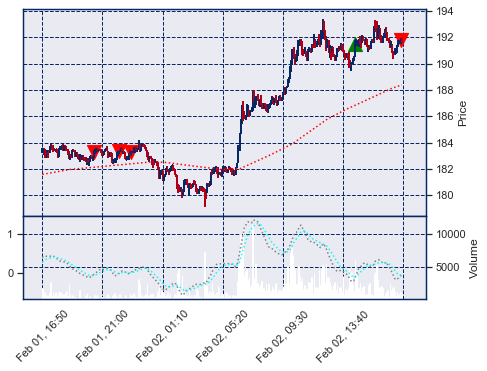

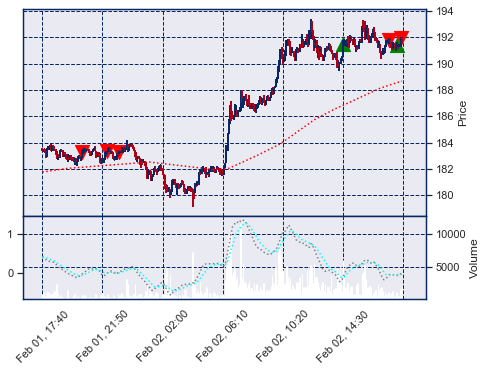

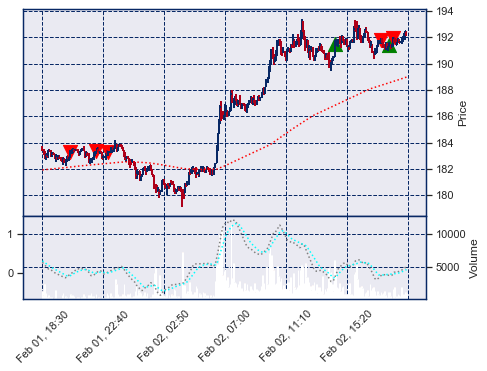

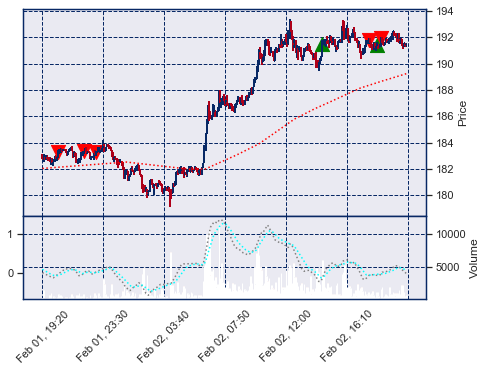

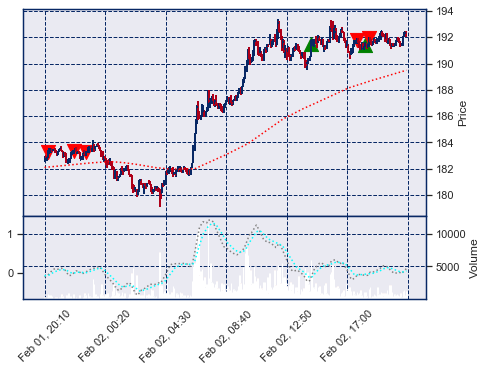

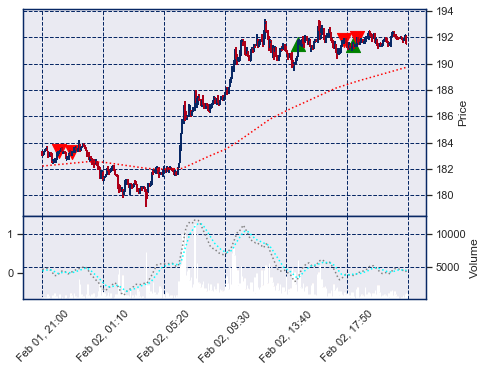

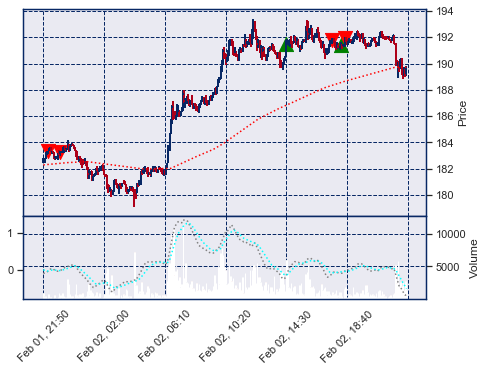

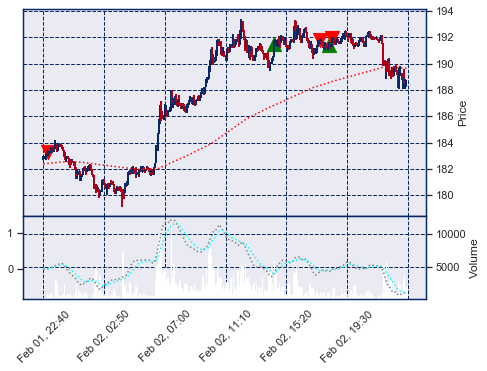

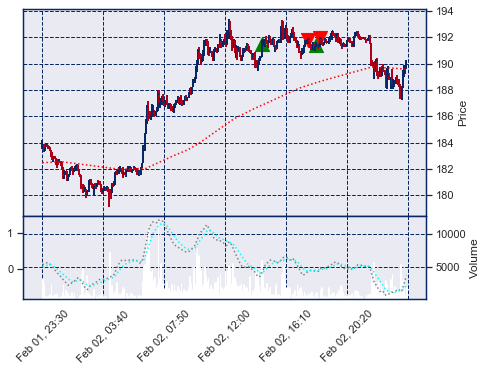

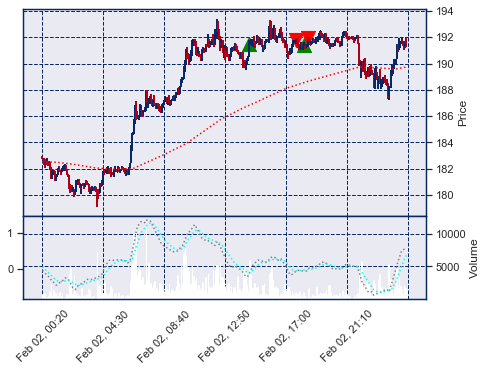

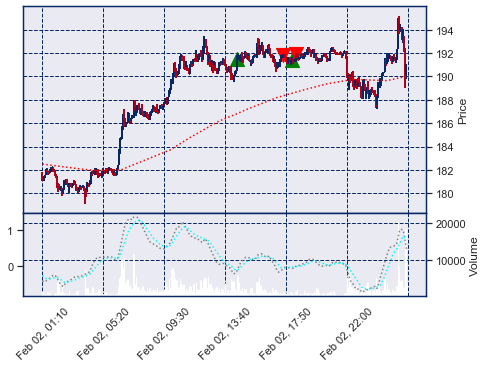

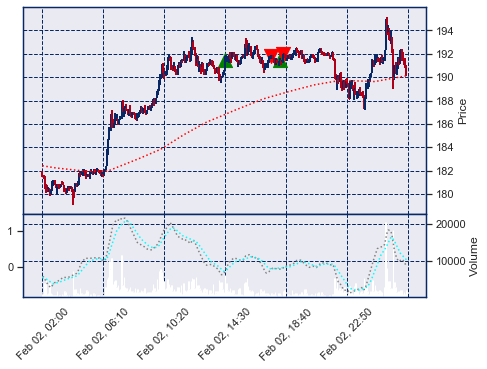

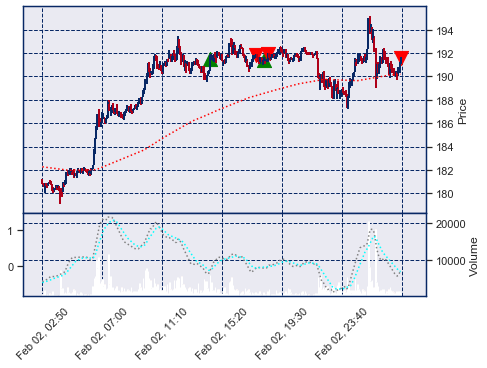

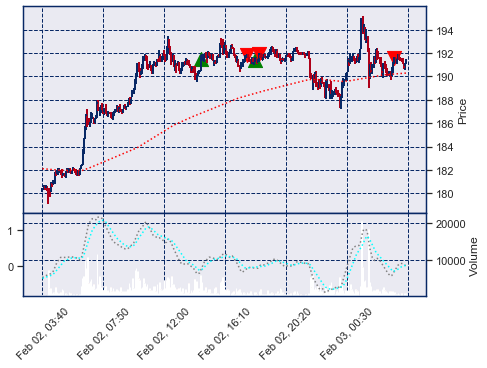

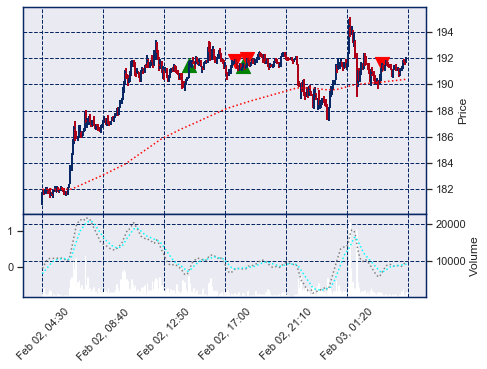

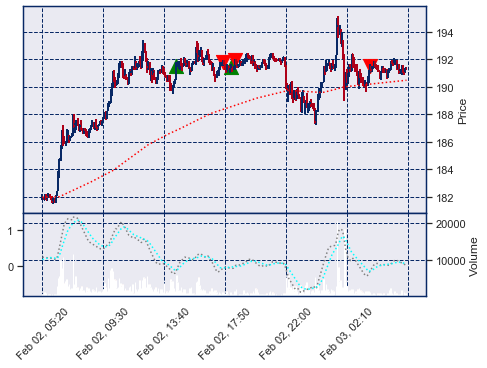

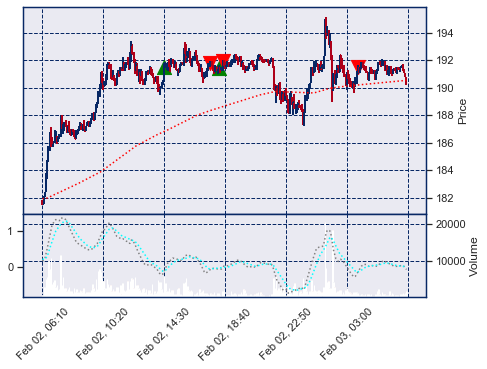

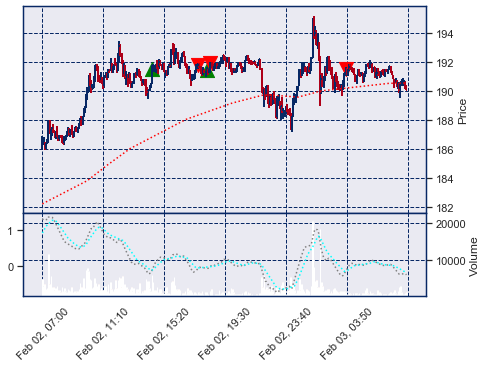

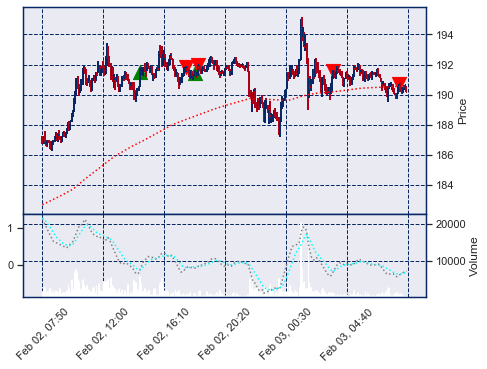

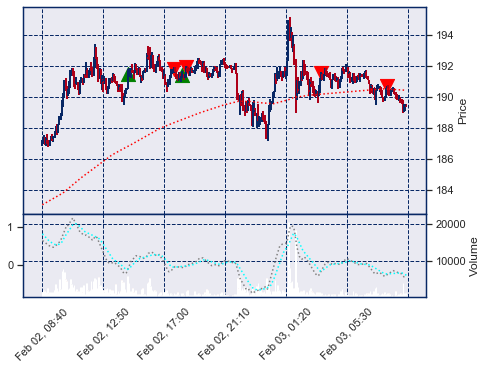

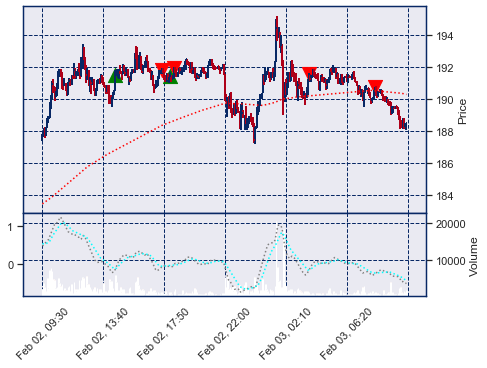

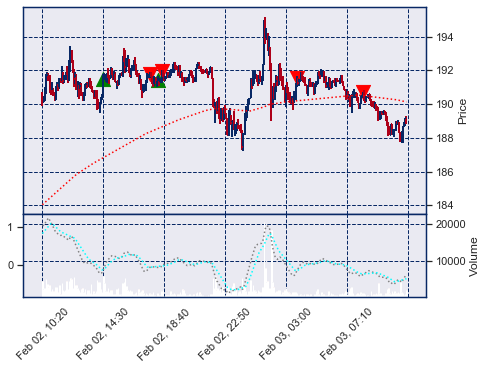

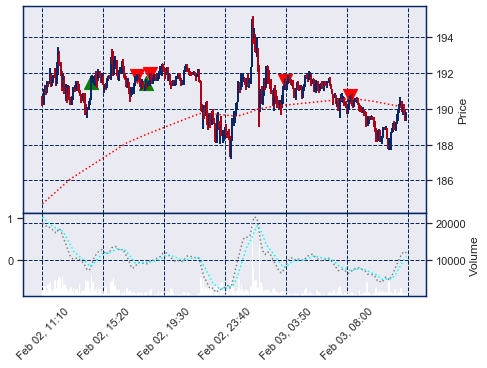

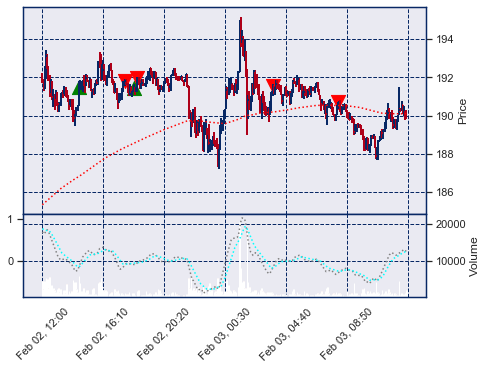

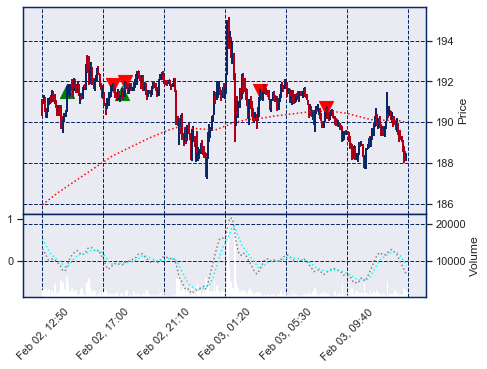

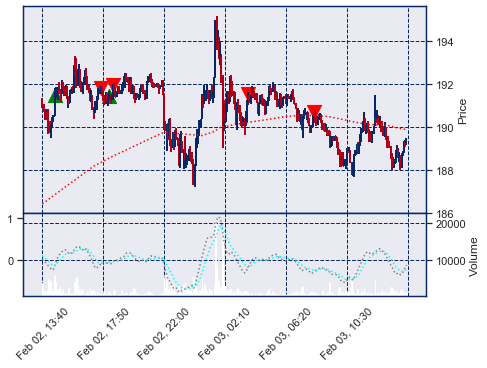

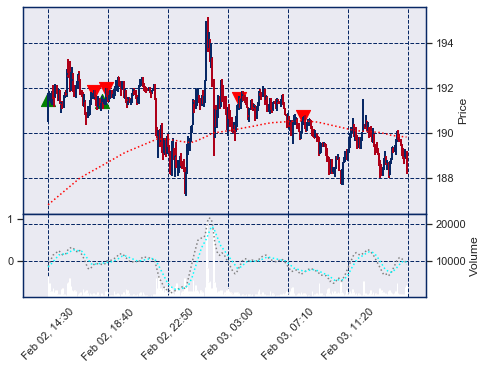

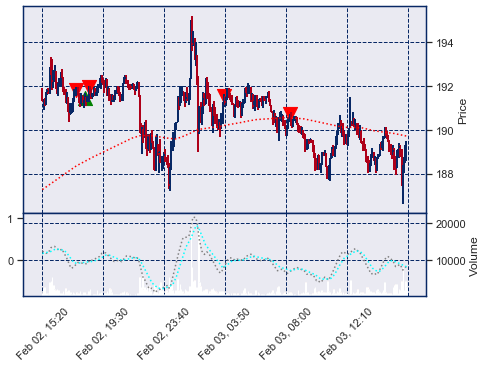

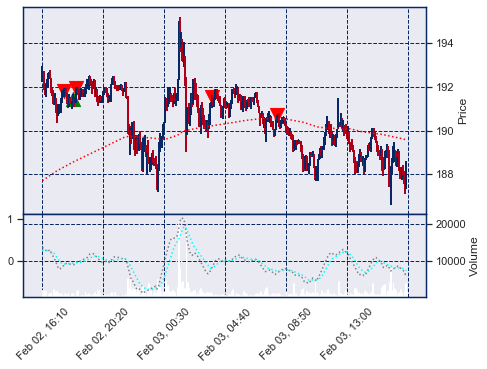

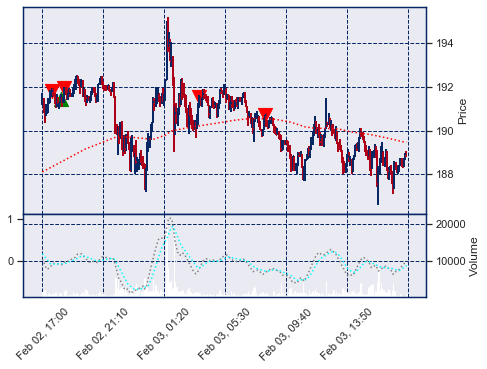

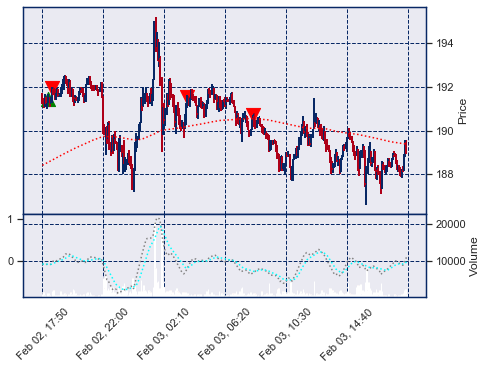

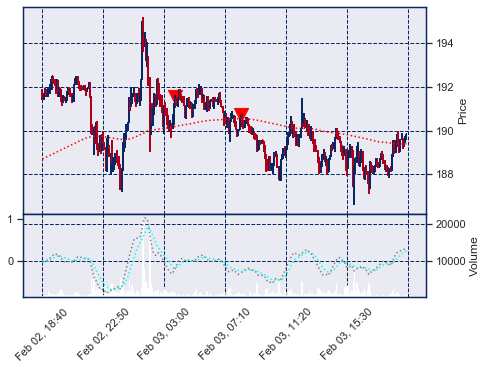

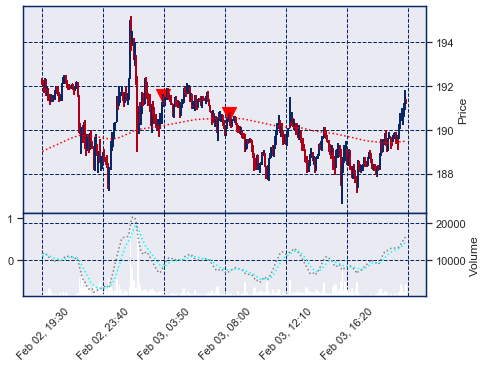

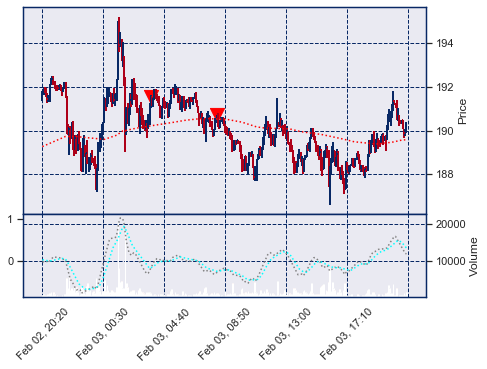

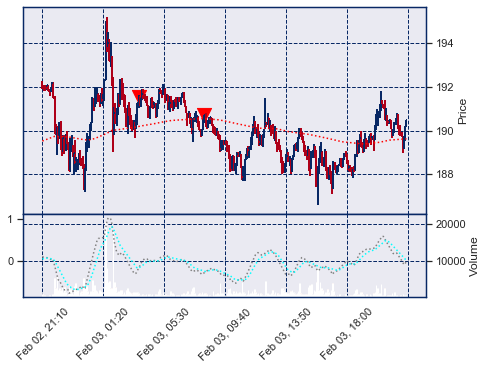

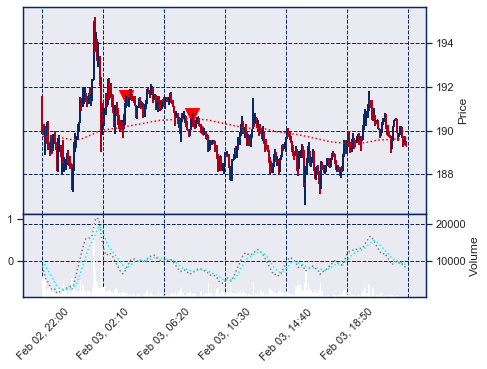

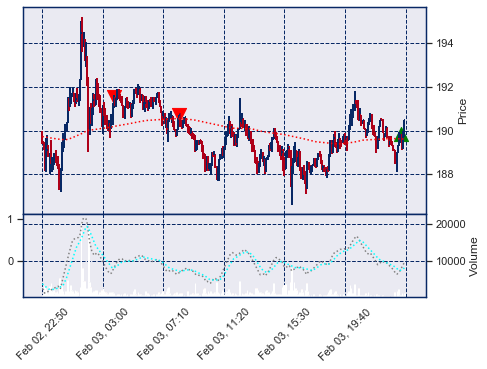

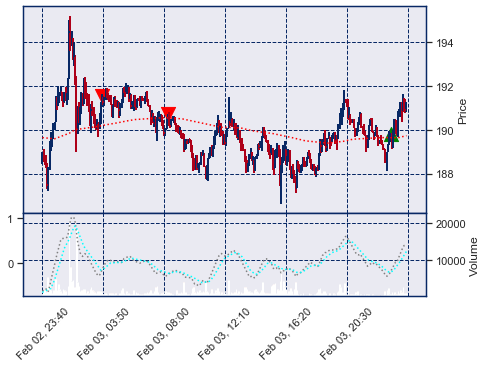

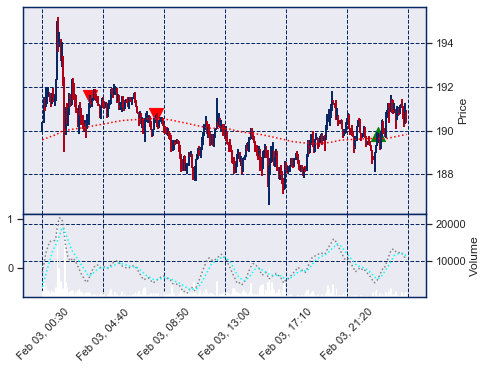

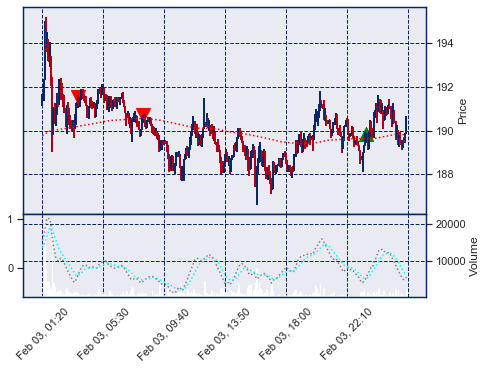

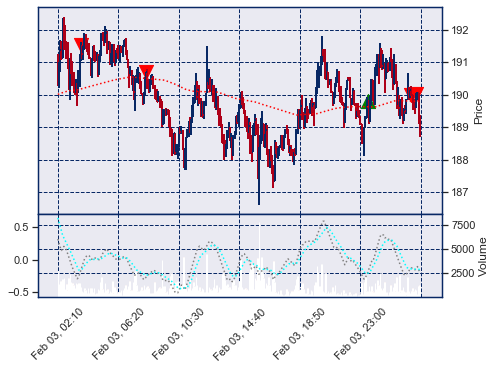

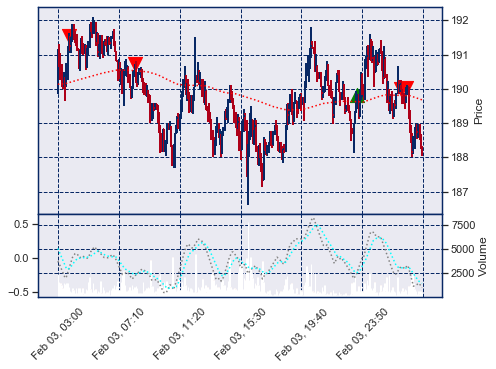

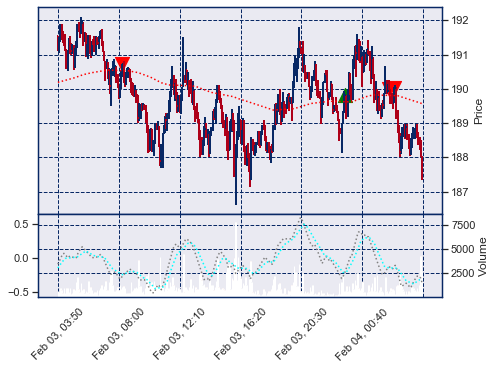

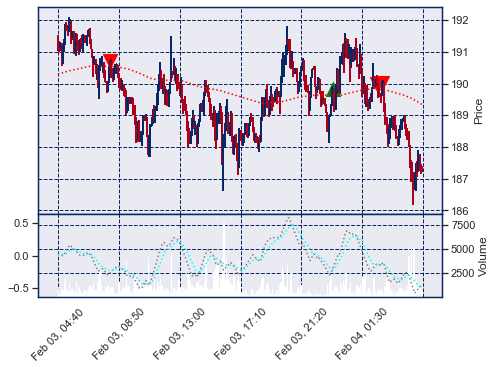

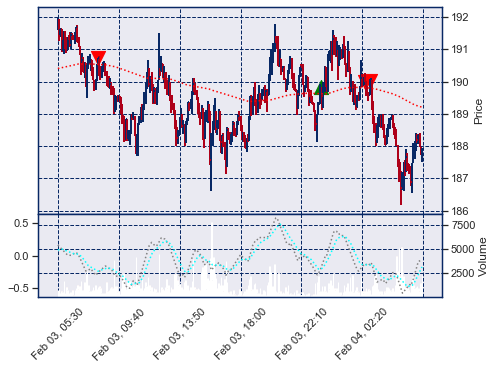

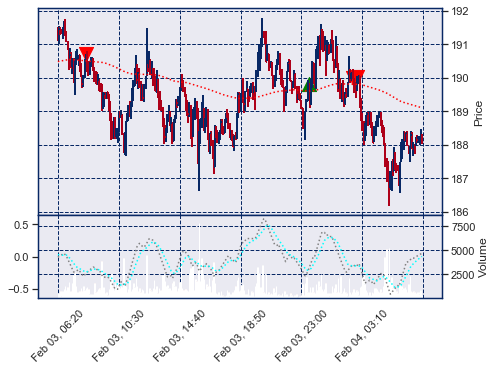

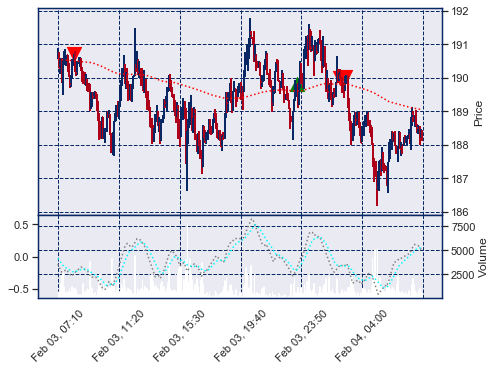

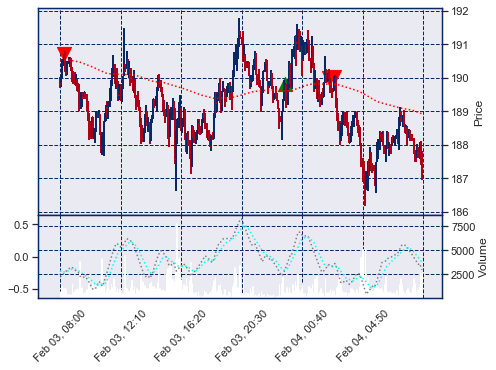

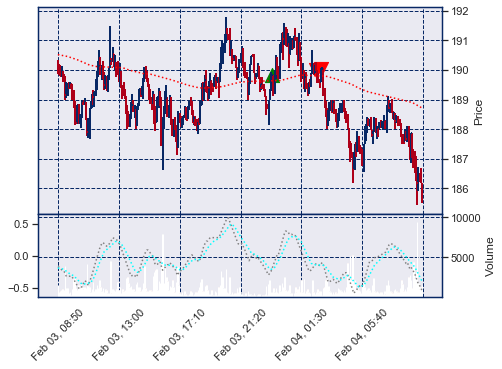

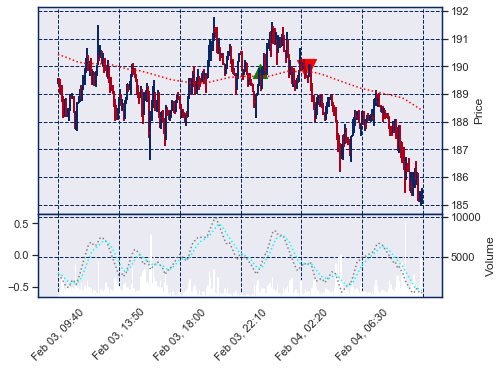

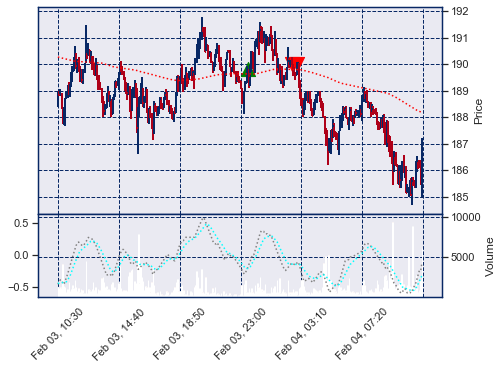

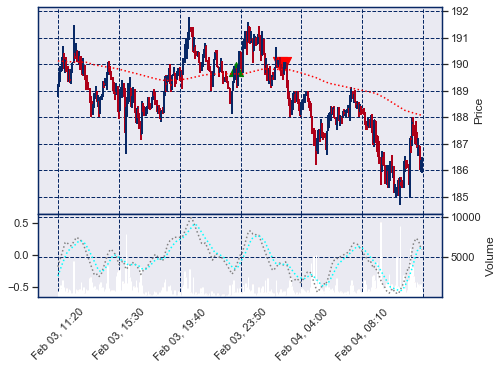

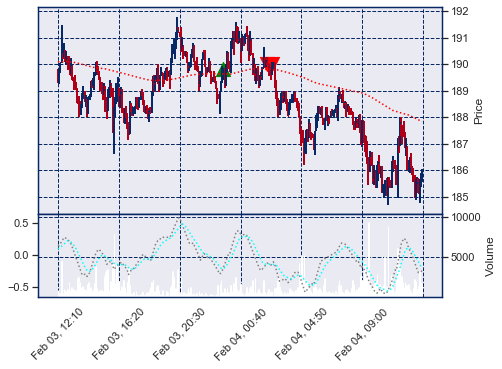

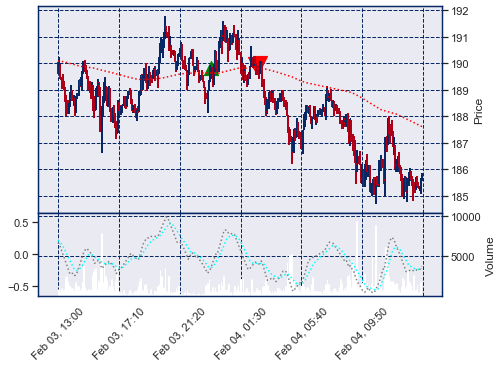

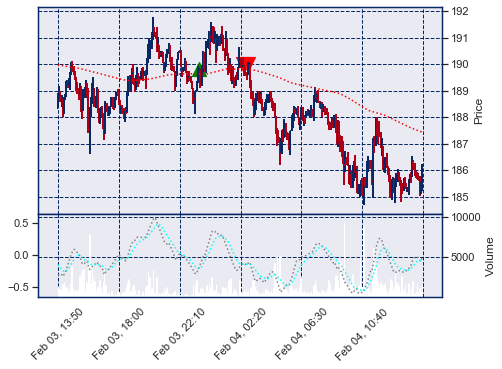

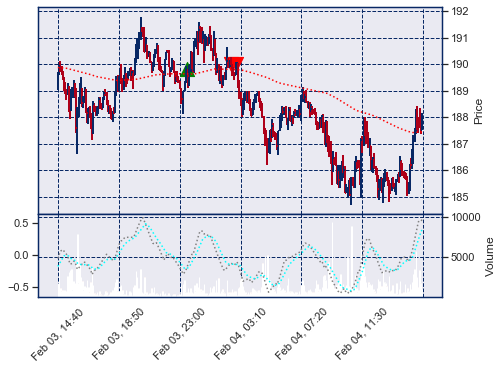

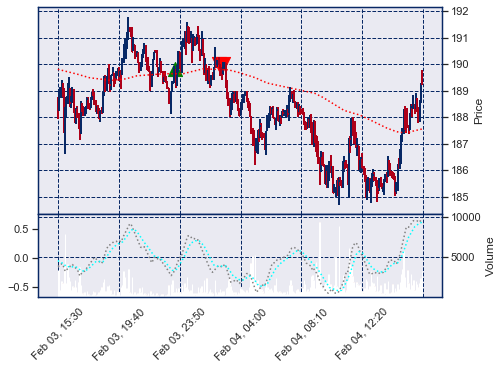

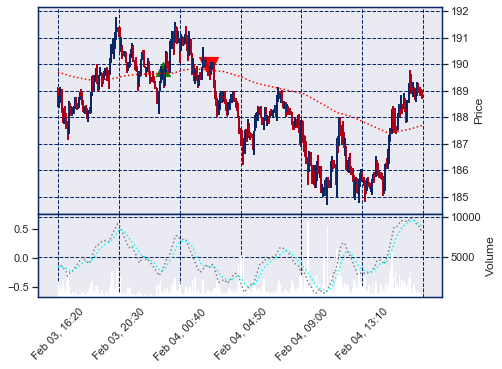

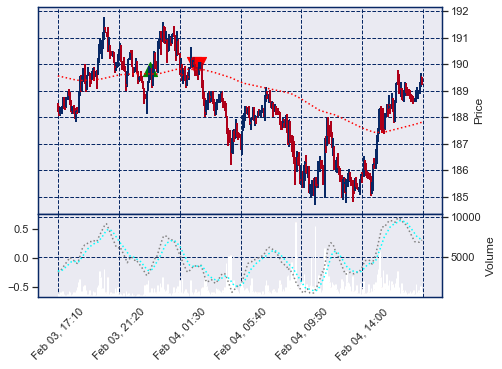

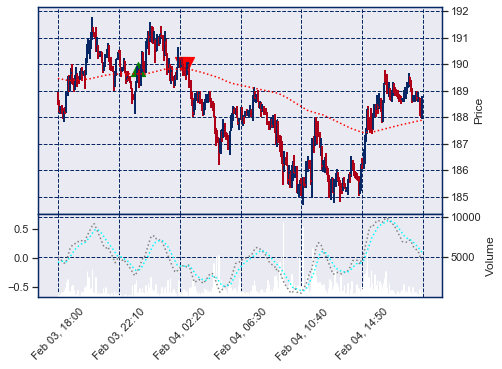

In [8]:
#Adding variables 
indicator["200MA"] = ta.trend.ema(indicator["Close"], periods=200)
indicator["uptrend"] = np.where(indicator["200MA"] < indicator["Close"], 1, 0)
indicator["trend_macd_diff1"] = indicator["trend_macd_diff"].shift(1)
#setting up the constraints
indicator["trend_signal_positive"] = np.where(
    (indicator["trend_macd_diff1"] * indicator["trend_macd_diff"] < 0)
    & (indicator["trend_macd_diff"] > 0)
    & (indicator["trend_macd_signal"] < 0)
    & (indicator["uptrend"] == 1),
    1,
    0,
)

import mplfinance as mpf

indicator["trend_signal_positive_p"] = np.where(
    (indicator["trend_signal_positive"] == 1) & (indicator["Outcome"] == "+0.5%"),
    indicator["Close"],
    np.nan,
)
indicator["trend_signal_positive_n"] = np.where(
    (indicator["Outcome"] != "+0.5%") & (indicator["trend_signal_positive"] == 1),
    indicator["Close"],
    np.nan,
)
for i in range(80):
    file = str(i)
    if i <= 9:
        file = "0" + file
    if (
        indicator[10 * i + 120245 : 10 * i + 120545]["trend_signal_positive_p"].sum()
        > 0
    ) and (
        indicator[10 * i + 120245 : 10 * i + 120545]["trend_signal_positive_n"].sum()
        > 0
    ):
        apds = [
            mpf.make_addplot(
                (indicator[10 * i + 120245 : 10 * i + 120545]["trend_macd"]),
                panel="lower",
                color="grey",
                linestyle="dotted",
            ),
            mpf.make_addplot(
                (indicator[10 * i + 120245 : 10 * i + 120545]["trend_macd_signal"]),
                panel="lower",
                color="cyan",
                linestyle="dotted",
            ),
            mpf.make_addplot(
                (indicator[10 * i + 120245 : 10 * i + 120545]["200MA"]),
                color="red",
                linestyle="dotted",
            ),
            mpf.make_addplot(
                indicator[10 * i + 120245 : 10 * i + 120545]["trend_signal_positive_p"],
                scatter=True,
                color="green",
                markersize=200,
                marker="^",
            ),
            mpf.make_addplot(
                indicator[10 * i + 120245 : 10 * i + 120545]["trend_signal_positive_n"],
                scatter=True,
                color="red",
                markersize=200,
                marker="v",
            ),
        ]
    elif (
        indicator[10 * i + 120245 : 10 * i + 120545]["trend_signal_positive_p"].sum()
        > 0
    ):
        apds = [
            mpf.make_addplot(
                (indicator[10 * i + 120245 : 10 * i + 120545]["trend_macd"]),
                panel="lower",
                color="grey",
                linestyle="dotted",
            ),
            mpf.make_addplot(
                (indicator[10 * i + 120245 : 10 * i + 120545]["trend_macd_signal"]),
                panel="lower",
                color="cyan",
                linestyle="dotted",
            ),
            mpf.make_addplot(
                (indicator[10 * i + 120245 : 10 * i + 120545]["200MA"]),
                color="red",
                linestyle="dotted",
            ),
            mpf.make_addplot(
                indicator[10 * i + 120245 : 10 * i + 120545]["trend_signal_positive_p"],
                scatter=True,
                color="green",
                markersize=200,
                marker="^",
            ),
        ]
    elif (
        indicator[10 * i + 120245 : 10 * i + 120545]["trend_signal_positive_n"].sum()
        > 0
    ):
        apds = [
            mpf.make_addplot(
                (indicator[10 * i + 120245 : 10 * i + 120545]["trend_macd"]),
                panel="lower",
                color="grey",
                linestyle="dotted",
            ),
            mpf.make_addplot(
                (indicator[10 * i + 120245 : 10 * i + 120545]["trend_macd_signal"]),
                panel="lower",
                color="cyan",
                linestyle="dotted",
            ),
            mpf.make_addplot(
                (indicator[10 * i + 120245 : 10 * i + 120545]["200MA"]),
                color="red",
                linestyle="dotted",
            ),
            mpf.make_addplot(
                indicator[10 * i + 120245 : 10 * i + 120545]["trend_signal_positive_n"],
                scatter=True,
                color="red",
                markersize=200,
                marker="v",
            ),
        ]
    else:
        apds = [
            mpf.make_addplot(
                (indicator[10 * i + 120245 : 10 * i + 120545]["trend_macd"]),
                panel="lower",
                color="grey",
                linestyle="dotted",
            ),
            mpf.make_addplot(
                (indicator[10 * i + 120245 : 10 * i + 120545]["trend_macd_signal"]),
                panel="lower",
                color="cyan",
                linestyle="dotted",
            ),
            mpf.make_addplot(
                (indicator[10 * i + 120245 : 10 * i + 120545]["200MA"]),
                color="red",
                linestyle="dotted",
            ),
        ]
    mpf.plot(
        indicator[10 * i + 120245 : 10 * i + 120545],
        addplot=apds,
        volume=True,
        savefig=dict(fname=file + "trend.jpg", dpi=100, pad_inches=0.6),
        style="starsandstripes",
    )

from PIL import Image
import glob

frames = []
imgs = glob.glob("*trend.jpg")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

frames[0].save(
    "trend.gif",
    format="GIF",
    append_images=frames[1:],
    save_all=True,
    duration=300,
    loop=0,
)

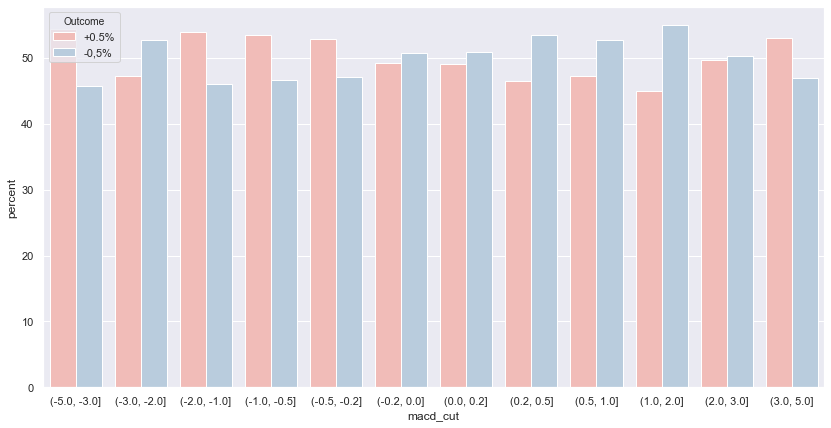

In [9]:
#code for barplot2
indicator['macd_cut']=pd.cut(indicator['trend_macd'],bins=[-5,-3,-2,-1,-0.5,-0.2,0,0.2,0.5,1,2,3,5])
histogram1=indicator.groupby(['macd_cut','Outcome']).size().reset_index()
histogram1.columns=['macd_cut','Outcome','Cases']
histogram1['Grouped_cases']=histogram1.groupby(['macd_cut'])['Cases'].transform(sum)
histogram1['percent']=histogram1['Cases']/histogram1['Grouped_cases']*100
plt.figure(figsize=(14,7))
sns.barplot(x="macd_cut", y="percent", hue="Outcome", data=histogram1,palette='Pastel1')

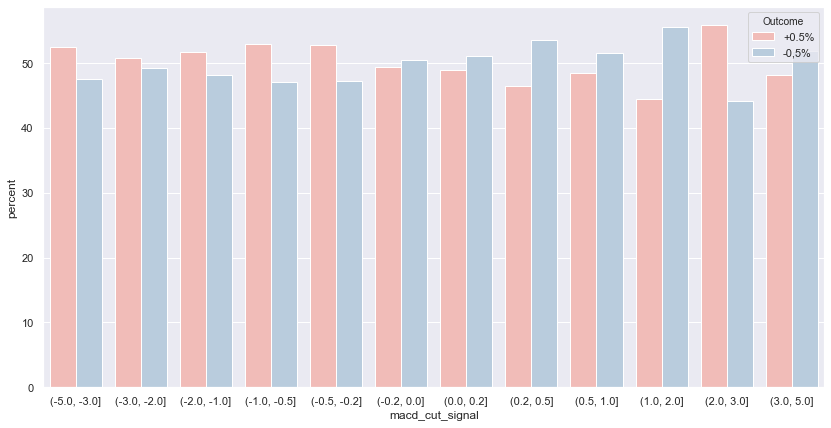

In [10]:
#code for barplot3
indicator['macd_cut_signal']=pd.cut(indicator['trend_macd_signal'],bins=[-5,-3,-2,-1,-0.5,-0.2,0,0.2,0.5,1,2,3,5])
histogram2=indicator.groupby(['macd_cut_signal','Outcome']).size().reset_index()
histogram2.columns=['macd_cut_signal','Outcome','Cases']
histogram2['Grouped_cases']=histogram2.groupby(['macd_cut_signal'])['Cases'].transform(sum)
histogram2['percent']=histogram2['Cases']/histogram2['Grouped_cases']*100
plt.figure(figsize=(14,7))
sns.barplot(x="macd_cut_signal", y="percent", hue="Outcome", data=histogram2,palette='Pastel1')

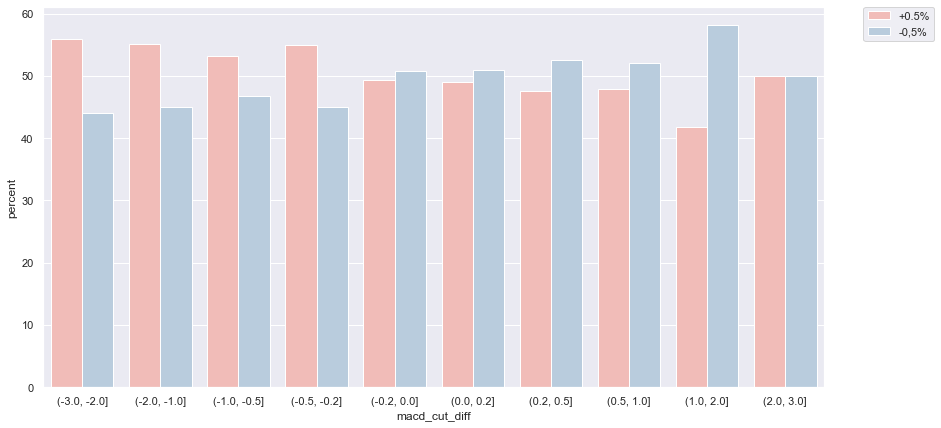

In [11]:
#code for barplot4
indicator['macd_cut_diff']=pd.cut(indicator['trend_macd_diff'],bins=[-3,-2,-1,-0.5,-0.2,0,0.2,0.5,1,2,3])
histogram3=indicator.groupby(['macd_cut_diff','Outcome']).size().reset_index()
histogram3.columns=['macd_cut_diff','Outcome','Cases']
histogram3['Grouped_cases']=histogram3.groupby(['macd_cut_diff'])['Cases'].transform(sum)
histogram3['percent']=histogram3['Cases']/histogram3['Grouped_cases']*100
plt.figure(figsize=(14,7))
sns.barplot(x="macd_cut_diff", y="percent", hue="Outcome", data=histogram3,palette='Pastel1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [21]:
%load_ext nb_black
# Training the first model
from sklearn.ensemble import RandomForestClassifier

Initial = indicator[0:120244][
    ["trend_macd", "trend_macd_signal", "trend_macd_diff", "Outcome"]
]
Initial = pd.concat(
    [
        Initial[Initial["Outcome"] == "+0.5%"].sample(57000),
        Initial[Initial["Outcome"] != "+0.5%"].sample(57000),
    ]
)
Initial = Initial.sample(frac=1)
X_train = Initial[["trend_macd", "trend_macd_signal", "trend_macd_diff"]]
y_train = np.where(Initial["Outcome"] == "+0.5%", 1, 0)
X_test = indicator[120245:][["trend_macd", "trend_macd_signal", "trend_macd_diff"]]
y_test = np.where(indicator[120245:]["Outcome"] == "+0.5%", 1, 0)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Classifier1 = RandomForestClassifier(
    max_depth=3,
    min_samples_leaf=400,
    max_features=3,
    min_samples_split=4,
    n_estimators=500,
    random_state=41,
)
Classifier1 = Classifier1.fit(X_train, y_train)
y_pred1 = Classifier1.predict(X_test)

confusion_matrix(y_test, y_pred1)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


array([[6956, 4396],
       [6790, 5122]], dtype=int64)

<IPython.core.display.Javascript object>

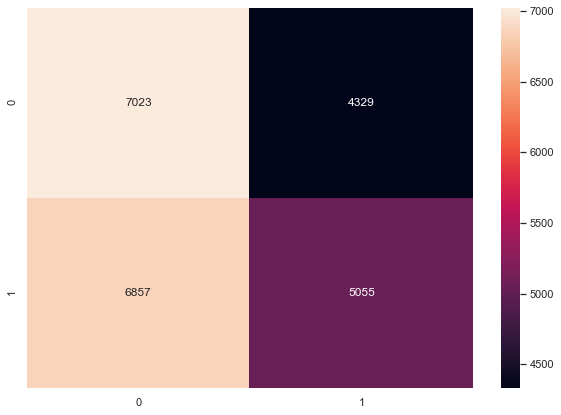

<IPython.core.display.Javascript object>

In [14]:
#confusion_matrix for first case
confusion = confusion_matrix(y_test, y_pred1)
df_cm = pd.DataFrame(confusion, index=["0", "1"], columns=["0", "1"])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="d")

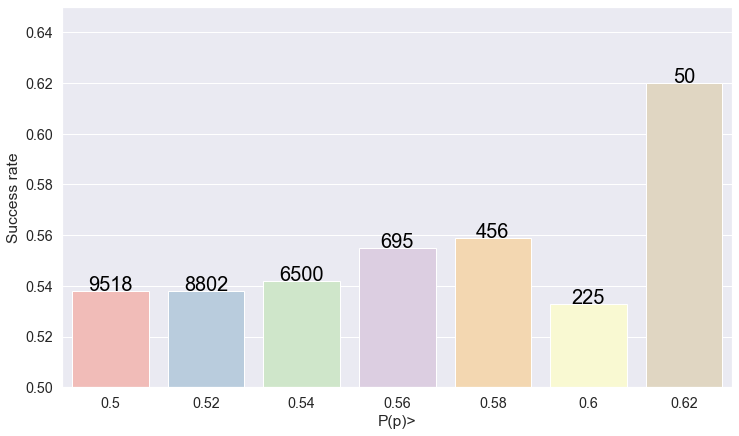

<IPython.core.display.Javascript object>

In [25]:
#conditional probability
predictions_proba = Classifier1.predict_proba(X_test)
predictions_probability = pd.concat(
    [pd.DataFrame(predictions_proba), pd.DataFrame(y_test)], axis=1
)
predictions_probability.columns = ["prob_0", "prob_1", "result"]

predictions = Classifier1.predict(X_test)
predictions_1 = pd.concat([pd.DataFrame(predictions), pd.DataFrame(y_test)], axis=1)
predictions_1.columns = ["prediction", "result"]
Results = pd.DataFrame([], columns=["P(p)>", "Success rate", "Quantity"])
for i in range(1, 10):
    P_p = np.round(0.48 + i / 50, 2)

    Quantity = len(
        (
            predictions_probability[
                predictions_probability["prob_1"] >= (0.48 + (i / 50))
            ]
        )
    )
    if Quantity == 0:
        break
    Success_rate = np.round(
        (
            predictions_probability[
                predictions_probability["prob_1"] >= (0.48 + (i / 50))
            ]["result"]
        ).sum()
        / len(
            (
                predictions_probability[
                    predictions_probability["prob_1"] >= (0.48 + (i / 50))
                ]
            )
        ),
        3,
    )
    Results = Results.append(
        {"P(p)>": P_p, "Success rate": Success_rate, "Quantity": Quantity},
        ignore_index=True,
    )
plt.figure(figsize=(12, 7))
sns.set(font_scale=1.3)
g = sns.barplot(data=Results, x="P(p)>", y="Success rate", palette="Pastel1")
plt.ylim(0.5, 0.65)
for index, row in Results.iterrows():
    g.text(
        row.name,
        row["Success rate"],
        int(row.Quantity),
        fontsize=20,
        color="black",
        ha="center",
    )

In [15]:
#adding the variables

indicator['trend_macd_diff1']=indicator['trend_macd_diff']-indicator['trend_macd_diff'].shift(1)
indicator['trend_macd_diff3']=indicator['trend_macd_diff']-indicator['trend_macd_diff'].shift(3)
indicator['trend_macd_diff5']=indicator['trend_macd_diff']-indicator['trend_macd_diff'].shift(5)
indicator['trend_macd_signal1']=indicator['trend_macd_signal']-indicator['trend_macd_signal'].shift(1)
indicator['trend_macd_signal3']=indicator['trend_macd_signal']-indicator['trend_macd_signal'].shift(3)
indicator['trend_macd_signal5']=indicator['trend_macd_signal']-indicator['trend_macd_signal'].shift(5)
indicator['trend_macd1']=indicator['trend_macd']-indicator['trend_macd'].shift(1)
indicator['trend_macd3']=indicator['trend_macd']-indicator['trend_macd'].shift(3)
indicator['trend_macd5']=indicator['trend_macd']-indicator['trend_macd'].shift(5)
indicator['trend']=(indicator['200MA']-indicator['Close'])/indicator['Close']


<IPython.core.display.Javascript object>

In [16]:
%load_ext nb_black
#second model
Initial=indicator[0:120244][['trend_macd','trend_macd_signal','trend_macd_diff','trend_macd_diff1','trend_macd_diff3','trend_macd_diff5','trend_macd_signal1','trend_macd_signal3','trend_macd_signal5','trend_macd1','trend_macd3','trend_macd5','trend','Outcome']].dropna()
Initial=pd.concat([Initial[Initial['Outcome']=='+0.5%'].sample(57000),Initial[Initial['Outcome']!='+0.5%'].sample(57000)])
Initial=Initial.sample(frac=1)
X_train=Initial[['trend_macd','trend_macd_signal','trend_macd_diff','trend_macd_diff1','trend_macd_diff3','trend_macd_diff5','trend_macd_signal1','trend_macd_signal3','trend_macd_signal5','trend_macd1','trend_macd3','trend_macd5','trend']]
y_train=np.where(Initial['Outcome']=='+0.5%',1,0)
X_test=indicator[120245:][['trend_macd','trend_macd_signal','trend_macd_diff','trend_macd_diff1','trend_macd_diff3','trend_macd_diff5','trend_macd_signal1','trend_macd_signal3','trend_macd_signal5','trend_macd1','trend_macd3','trend_macd5','trend']]
y_test=np.where(indicator[120245:]['Outcome']=='+0.5%',1,0)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestClassifier

Classifier = RandomForestClassifier(max_depth=11,min_samples_leaf=400,max_features=11,min_samples_split=4,n_estimators=500, random_state=28)
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


array([[5447, 5905],
       [4982, 6930]], dtype=int64)

<IPython.core.display.Javascript object>

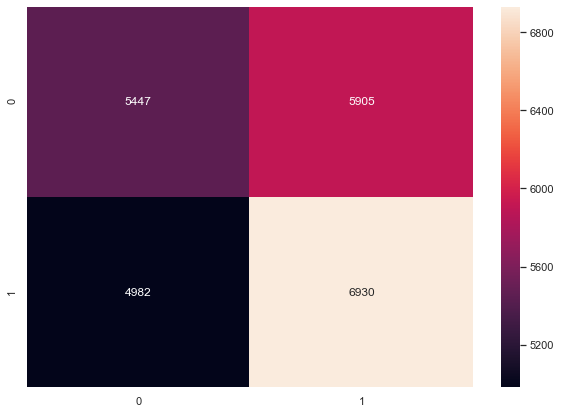

<IPython.core.display.Javascript object>

In [17]:
#second confusion matrix
sns.set(font_scale=1)
confusion = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion, index=["0", "1"], columns=["0", "1"])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="d")

0.54
0.56
0.57
0.59
0.59
0.59
0.62
0.68


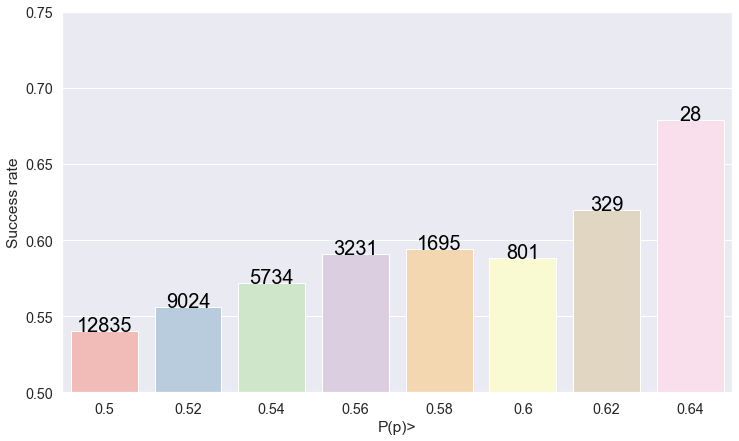

<IPython.core.display.Javascript object>

In [20]:
#conditional probability
predictions_proba = Classifier.predict_proba(X_test)
predictions_probability = pd.concat(
    [pd.DataFrame(predictions_proba), pd.DataFrame(y_test)], axis=1
)
predictions_probability.columns = ["prob_0", "prob_1", "result"]

predictions = Classifier.predict(X_test)
predictions_1 = pd.concat([pd.DataFrame(predictions), pd.DataFrame(y_test)], axis=1)
predictions_1.columns = ["prediction", "result"]
Results = pd.DataFrame([], columns=["P(p)>", "Success rate", "Quantity"])
for i in range(1, 10):
    P_p = np.round(0.48 + i / 50, 2)

    Quantity = len(
        (
            predictions_probability[
                predictions_probability["prob_1"] >= (0.48 + (i / 50))
            ]
        )
    )
    if Quantity == 0:
        break
    Success_rate = np.round(
        (
            predictions_probability[
                predictions_probability["prob_1"] >= (0.48 + (i / 50))
            ]["result"]
        ).sum()
        / len(
            (
                predictions_probability[
                    predictions_probability["prob_1"] >= (0.48 + (i / 50))
                ]
            )
        ),
        3,
    )
    Results = Results.append(
        {"P(p)>": P_p, "Success rate": Success_rate, "Quantity": Quantity},
        ignore_index=True,
    )
plt.figure(figsize=(12, 7))
sns.set(font_scale=1.3)
g = sns.barplot(data=Results, x="P(p)>", y="Success rate", palette="Pastel1")
plt.ylim(0.5, 0.75)
for index, row in Results.iterrows():
    g.text(
        row.name,
        row["Success rate"],
        int(row.Quantity),
        fontsize=20,
        color="black",
        ha="center",
    )